In [1]:
import sys, os
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from torchvision import transforms

In [2]:
sys.path.append("../")

In [3]:
from Transformers import UNetDataset, ChannelsFirst, ToTensor, Rescale

In [4]:
DATA_DIR_DEEPTHOUGHT="/storage/yw18581/data"
data_dir = DATA_DIR_DEEPTHOUGHT
train_test = os.path.join(data_dir, "train_validation_test")

In [5]:
data = np.load("/storage/yw18581/data/train_validation_test/Xy_train+val_clean_300_24_10_25.npz")
x = data["x"]
y = data['y']

In [5]:
composed = transforms.Compose([Rescale(.25), ChannelsFirst(), ToTensor()])

In [7]:
train_dataset = UNetDataset(x, y, transform=composed)

In [8]:
data_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)

In [6]:
torch.cuda.empty_cache() 

##### in UNet_torch_like_keras.py, model defines as the previously used keras model

In [7]:
from UNet_torch_like_keras import UNet, dice_loss

In [11]:
net_keras_like = UNet()

In [12]:
criterion = dice_loss

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [14]:
net_keras_like.to(device)

UNet(
  (conv_block_down1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_bloc

In [15]:
import torch.optim as optim


optimizer = optim.Adam(net_keras_like.parameters(), lr=1e-5)

In [16]:
import matplotlib.pyplot as plt

Epoch 1

[1,    30] loss: -0.028
[1,    60] loss: -0.057
Epoch 2

[2,    30] loss: -0.027
[2,    60] loss: -0.058
Epoch 3

[3,    30] loss: -0.030
[3,    60] loss: -0.058
Epoch 4

[4,    30] loss: -0.030
[4,    60] loss: -0.058
Epoch 5

[5,    30] loss: -0.029
[5,    60] loss: -0.060
Epoch 6

[6,    30] loss: -0.032
[6,    60] loss: -0.065
Epoch 7

[7,    30] loss: -0.040
[7,    60] loss: -0.104
Epoch 8

[8,    30] loss: -0.232
[8,    60] loss: -0.832
Epoch 9

[9,    30] loss: -0.711
[9,    60] loss: -1.491
Epoch 10

[10,    30] loss: -0.806
[10,    60] loss: -1.624
Epoch 11

[11,    30] loss: -0.832
[11,    60] loss: -1.670
Epoch 12

[12,    30] loss: -0.846
[12,    60] loss: -1.705
Epoch 13

[13,    30] loss: -0.858
[13,    60] loss: -1.716
Epoch 14

[14,    30] loss: -0.870
[14,    60] loss: -1.743
Epoch 15

[15,    30] loss: -0.875
[15,    60] loss: -1.755
Epoch 16

[16,    30] loss: -0.888
[16,    60] loss: -1.773
Epoch 17

[17,    30] loss: -0.886
[17,    60] loss: -1.766
Epoch 1

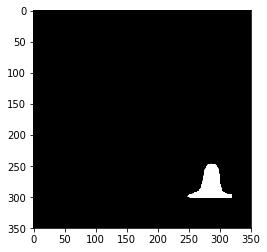

In [17]:
for epoch in range(100):
    print("Epoch {}\n".format(epoch+1))
    running_loss = 0.0
    for i, batch in enumerate(data_loader):
        inputs = batch['image'].float().to(device)
        labels = batch['mask'].float().to(device)
        
        optimizer.zero_grad()
        outputs = net_keras_like(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 30 == 29:    # print every 2000 mini_batches
            print('[%d, %5d] loss: %.3f' % 
                 (epoch + 1, i + 1, running_loss / 30))
    if epoch % 25 == 24:
        plt.imshow(outputs[0][0,...].cpu().detach().numpy(), cmap='gray')
print('Finished Training')

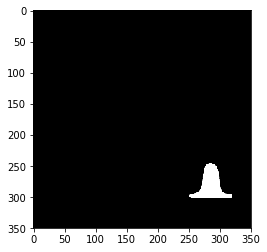

In [18]:
plt.imshow(outputs[2][0,...].cpu().detach().numpy(), cmap='gray')

In [8]:
test_data = np.load("/storage/yw18581/data/train_validation_test/Xy_test_clean_300_24_10_25.npz")
x_test = test_data["x"]
y_test = test_data['y']


In [20]:

test_dataset = UNetDataset(x_test, y_test, transform=composed)

test_data_loader = DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=4)

In [21]:
for i, test_batch in enumerate(test_data_loader):
    print(i, test_batch['image'].shape, test_batch['mask'].shape)
    if i==4:
        break

0 torch.Size([16, 1, 350, 350]) torch.Size([16, 1, 350, 350])
1 torch.Size([16, 1, 350, 350]) torch.Size([16, 1, 350, 350])
2 torch.Size([16, 1, 350, 350]) torch.Size([16, 1, 350, 350])
3 torch.Size([16, 1, 350, 350]) torch.Size([16, 1, 350, 350])
4 torch.Size([16, 1, 350, 350]) torch.Size([16, 1, 350, 350])


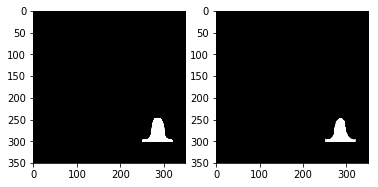

In [60]:
for i in range(len(test_inputs)):    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(preds[i][0,...].cpu().detach().numpy(), cmap='gray')
    f.add_subplot(1,2, 2)
    plt.imshow(test_labels[i][0,...].cpu().detach().numpy(), cmap='gray')
    plt.show(block=True)


In [50]:
torch.save(net_keras_like.state_dict(), "../model/trained_UNet_pytorch_keras-like_100epochs.pkl")

In [25]:
model_inference = UNet()

In [27]:
model_inference.eval()

UNet(
  (conv_block_down1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_bloc

In [42]:
model_inference.to(device)

UNet(
  (conv_block_down1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_block_down4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (conv_bloc

In [26]:
model_inference.load_state_dict(torch.load("../model/trained_UNet_pytorch_keras-like_100epochs.pkl"))

<All keys matched successfully>

In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [29]:
predictions = []
for i, test_batch in enumerate(test_data_loader):
    test_inputs = test_batch['image'].float().to(device)
    test_labels = test_batch['mask'].float().to(device)
    preds = model_inference(test_inputs)
    predictions.append(preds)

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

In [31]:
import matplotlib.pyplot as plt

In [36]:
test_image.size()

torch.Size([16, 1, 350, 350])

In [44]:
model_inference(test_image.float().to(device))

tensor([[[[1.5138e-06, 6.4526e-12, 8.9250e-15,  ..., 7.7720e-16,
           8.1648e-11, 3.7575e-06],
          [1.0631e-11, 2.1511e-22, 4.4686e-28,  ..., 1.5572e-30,
           8.9686e-21, 7.3041e-12],
          [2.9637e-15, 2.4948e-29, 3.5770e-37,  ..., 0.0000e+00,
           2.6086e-27, 2.5118e-15],
          ...,
          [1.7652e-22, 0.0000e+00, 0.0000e+00,  ..., 5.8688e-29,
           1.2711e-19, 1.8142e-11],
          [5.2850e-15, 9.6984e-30, 5.2541e-38,  ..., 5.5311e-19,
           4.9912e-13, 1.3828e-07],
          [1.1233e-08, 3.0573e-17, 1.3672e-22,  ..., 1.1917e-11,
           3.7427e-08, 4.3065e-05]]],


        [[[1.3923e-06, 5.4662e-12, 7.2003e-15,  ..., 1.1514e-15,
           1.0565e-10, 4.3107e-06],
          [9.0820e-12, 1.5632e-22, 2.9512e-28,  ..., 3.3939e-30,
           1.5046e-20, 9.7218e-12],
          [2.4090e-15, 1.6422e-29, 2.0687e-37,  ..., 0.0000e+00,
           5.2170e-27, 3.6732e-15],
          ...,
          [1.6463e-22, 0.0000e+00, 0.0000e+00,  ..., 4.18

In [47]:
for i, batch in enumerate(test_data_loader):
    test_image, test_mask = batch['image'], batch['mask']
    pred = model_inference(test_image.float().to(device))
    f = plt.figure()
    f.add_subplot(1,3, 1)
    plt.imshow(test_image[i][0,...], cmap='gray')
    f.add_subplot(1,3, 2)
    plt.imshow(test_mask[i][0,...], cmap='gray')
    f.add_subplot(1,3, 3)
    plt.imshow(pred[i][0,...].cpu().detach().numpy(), cmap='gray')
    plt.show(block=True)

RuntimeError: CUDA out of memory. Tried to allocate 120.00 MiB (GPU 0; 11.91 GiB total capacity; 11.15 GiB already allocated; 54.69 MiB free; 174.82 MiB cached)